In [1]:
# !pip install opendatasets

In [2]:
# op.download('https://www.kaggle.com/datasets/trumedicines/pharmaceutical-tablets-dataset')

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D ,MaxPooling2D ,Flatten,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [4]:
#SCALLING

train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [5]:
#INPUT DATA FROM FILE

train_data=train.flow_from_directory("D:/DATA SCIENCE/Extra Projects/COVID -19, XRAY/xray_dataset_covid19/train"
                                     ,class_mode='binary',target_size=(500,500) ,color_mode="grayscale")
val_data=train.flow_from_directory("D:/DATA SCIENCE/Extra Projects/COVID -19, XRAY/xray_dataset_covid19/test",
                                   target_size=(500,500)
                                     ,class_mode='binary',color_mode="grayscale")

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
#CLASSES
train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

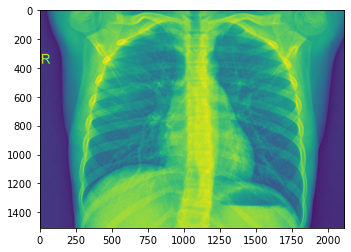

In [7]:
from PIL import Image
im = Image.open("D:/DATA SCIENCE/Extra Projects/COVID -19, XRAY/xray_dataset_covid19/train/NORMAL/IM-0003-0001.jpeg") 
plt.imshow(im)


(1509, 2111, 3)

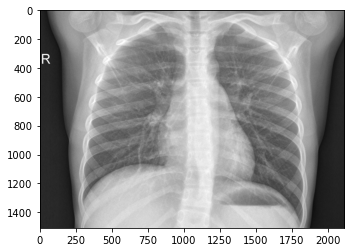

In [8]:
import cv2

img=cv2.imread("D:/DATA SCIENCE/Extra Projects/COVID -19, XRAY/xray_dataset_covid19/train/NORMAL/IM-0003-0001.jpeg")
plt.imshow(img)
img.shape

In [19]:
#MODELBUILDING
model=Sequential()
model.add(Conv2D(50,(3,3),input_shape=(500,500,1),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(80,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(40,(3,3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())

model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))


model.add(Dense(1,activation='sigmoid'))

In [20]:
#MODEL COMPILE
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
#MODEL FIT
model_fit=model.fit(train_data,validation_data=val_data,epochs=8)

Epoch 1/8
5/5 [==============================] - 54s 11s/step - loss: 0.8004 - accuracy: 0.5338 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 2/8
5/5 [==============================] - 41s 9s/step - loss: 0.6732 - accuracy: 0.5000 - val_loss: 0.6630 - val_accuracy: 0.5000
Epoch 3/8
5/5 [==============================] - 42s 8s/step - loss: 0.6157 - accuracy: 0.5068 - val_loss: 0.5697 - val_accuracy: 0.9750
Epoch 4/8
5/5 [==============================] - 50s 11s/step - loss: 0.4591 - accuracy: 0.8649 - val_loss: 0.2831 - val_accuracy: 1.0000
Epoch 5/8
5/5 [==============================] - 48s 11s/step - loss: 0.3836 - accuracy: 0.8649 - val_loss: 0.1104 - val_accuracy: 0.9750
Epoch 6/8
5/5 [==============================] - 47s 10s/step - loss: 0.2897 - accuracy: 0.9054 - val_loss: 0.1466 - val_accuracy: 0.9750
Epoch 7/8
5/5 [==============================] - 47s 9s/step - loss: 0.2477 - accuracy: 0.9324 - val_loss: 0.1372 - val_accuracy: 0.9750
Epoch 8/8
5/5 [======================

In [22]:
#MODEL SAVE
model.save('COVID-19-XRAY.h5')

NORMAL


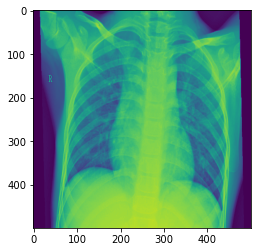

In [23]:
#PREDICTION
img=cv2.imread("D:/DATA SCIENCE/Extra Projects/COVID -19, XRAY/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg",
               cv2.IMREAD_GRAYSCALE)

img=cv2.resize(img,(500,500))
plt.imshow(img)

img=np.expand_dims(img,0)
output=model.predict(img)
if output==0:
    print('NORMAL')
else:
    print('PNEUMONIA')

In [24]:
import os

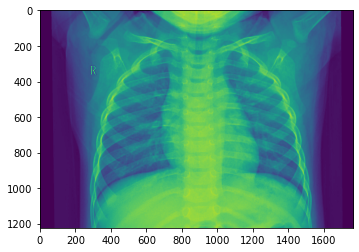

NORMAL


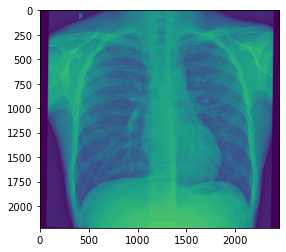

NORMAL


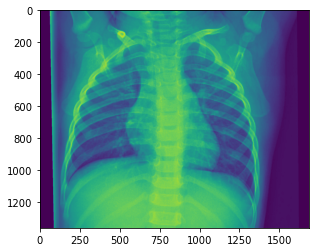

NORMAL


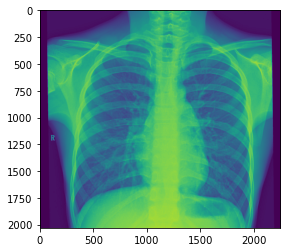

NORMAL


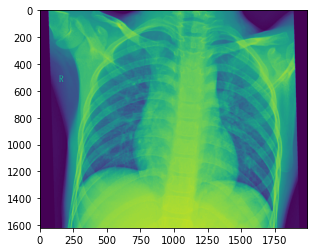

NORMAL


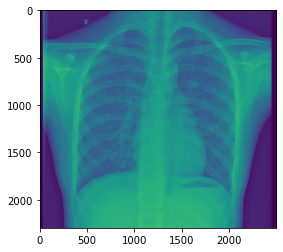

NORMAL


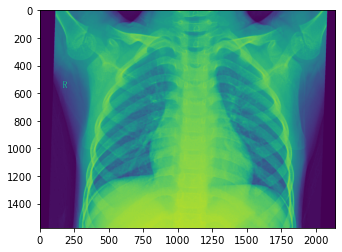

NORMAL


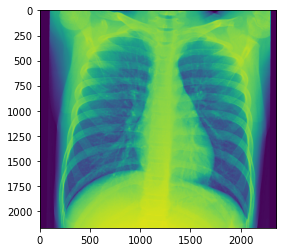

NORMAL


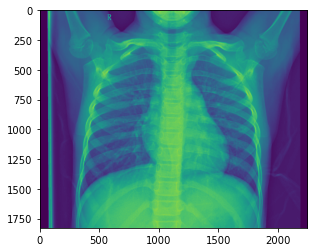

NORMAL


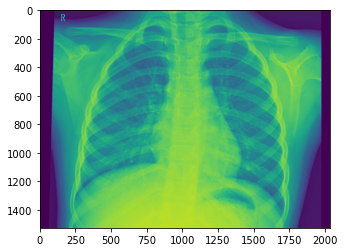

NORMAL


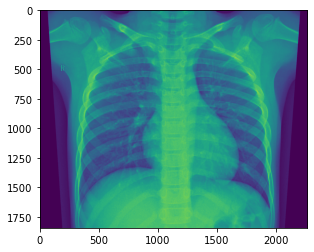

NORMAL


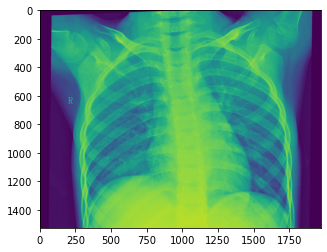

NORMAL


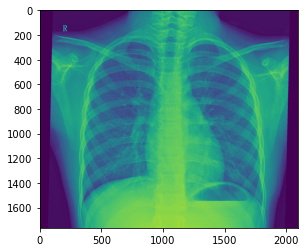

NORMAL


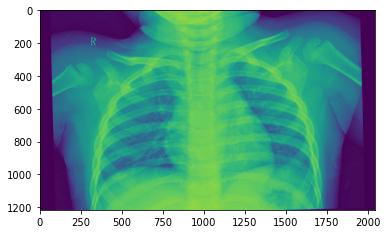

NORMAL


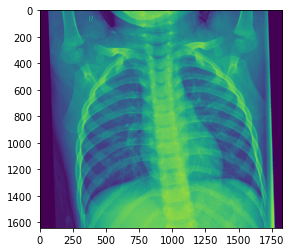

NORMAL


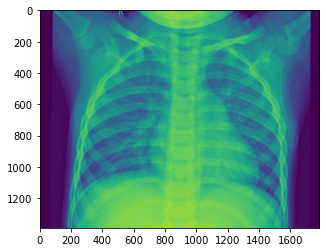

NORMAL


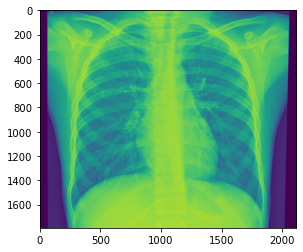

NORMAL


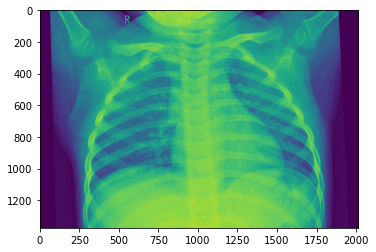

NORMAL


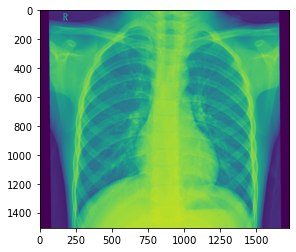

NORMAL


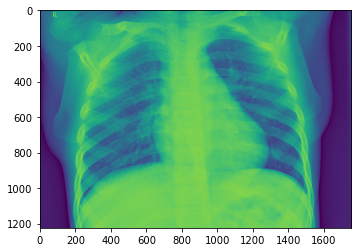

NORMAL


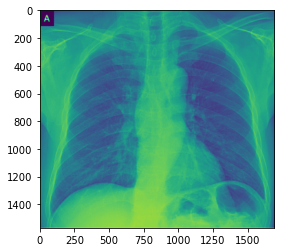

PNEUMONIA


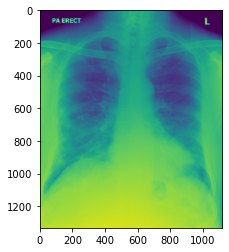

PNEUMONIA


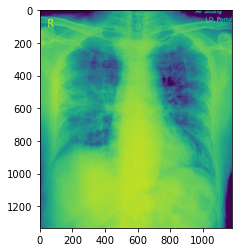

PNEUMONIA


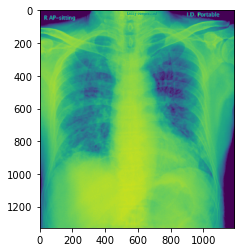

PNEUMONIA


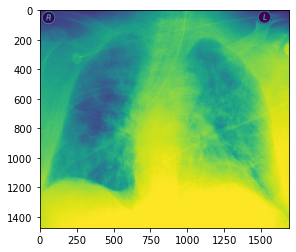

PNEUMONIA


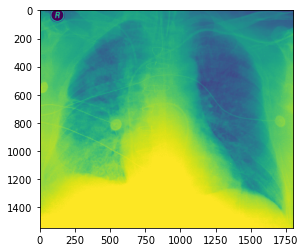

PNEUMONIA


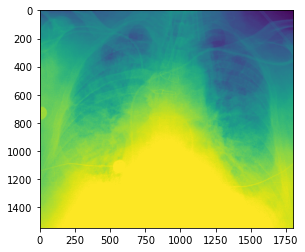

PNEUMONIA


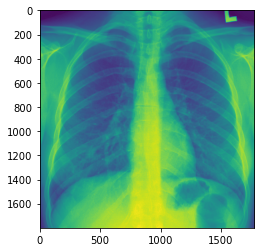

PNEUMONIA


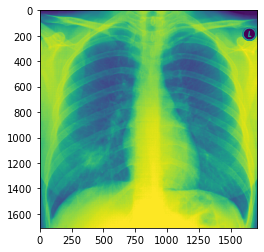

PNEUMONIA


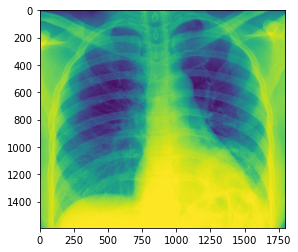

PNEUMONIA


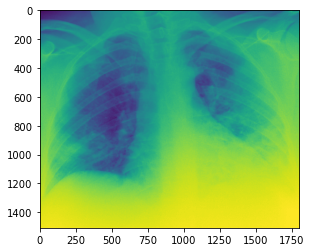

PNEUMONIA


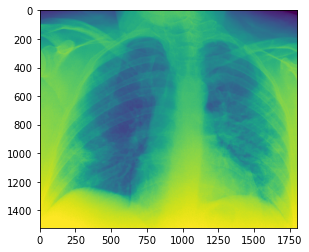

PNEUMONIA


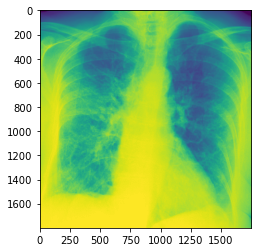

PNEUMONIA


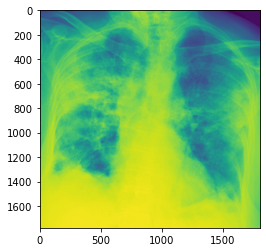

PNEUMONIA


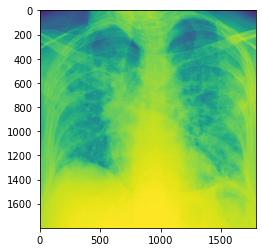

PNEUMONIA


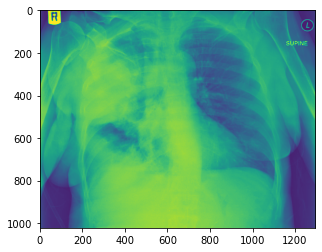

NORMAL


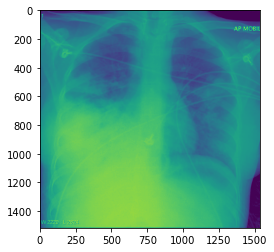

PNEUMONIA


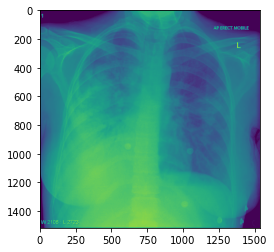

PNEUMONIA


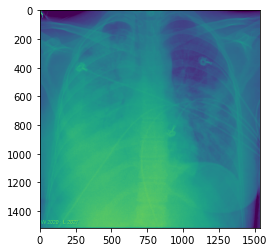

PNEUMONIA


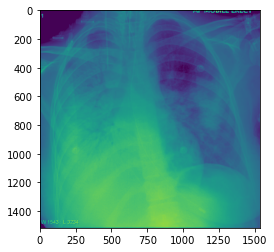

PNEUMONIA


In [25]:
#PREDICTIONS

path="D:/DATA SCIENCE/Extra Projects/COVID -19, XRAY/xray_dataset_covid19/mix"
for i in os.listdir(path):
    images=cv2.imread(path+ '/' +i, cv2.IMREAD_GRAYSCALE)
    plt.imshow(images)
    plt.show()
    images=cv2.resize(images,(500,500))
    images=np.expand_dims(images,0)
    output=model.predict(images)
    
    if output==0:
        print('NORMAL')
    else:
        print('PNEUMONIA')